### 1. Генерация случайных величин с заранее заданной ковариационной матрицей.



Разложение Холецкого используется для генерации коррелированных между собой случайных величин. Проще говоря, когда есть какой-то набор независимых случайных величин и ковариационная матрица. Как из этого получить набор случайных величин, имеющих такую ковариационную матрицу ?

Это нужно как для моделирования случайных сигналов и физических процессов, так и в качестве вспомогательного элемента других вычислительных методов (Монте-Карло).
Решение этой задачи делается с помощью разложения Холецкого. Алгоритм заключается в следующем:
1. Осуществить разложение Холецкого ковариационной матрицы: $\boldsymbol{\Sigma}=\mathbf{A} \mathbf{A}^T$
2. Сгенерировать случайный вектор $\mathbf{z}$, компонентами которого являются независимые случайные величины с нормальным распределением

3. Решением поставленной задачи будет вектор:
$$
\mathbf{x}=\mathbf{m}+\mathbf{A} \mathbf{z}
$$
Здесь $\mathbf{m}$ - это постоянный вектор, составленный из математических ожиданий компонент вектора $\mathbf{z}$.

Напишите функцию, которая в качестве входного параметра берёт ковариационную матрицу, а возвращает набор случайных величин, действуя по описанному выше алгоритму.

Сравните скорость работы вашей функции со встроенной библиотечной реализацией, как тут [Работа со случайными величинами.](https://miptstats.github.io/courses/python/07_random.html)

__Решение:__

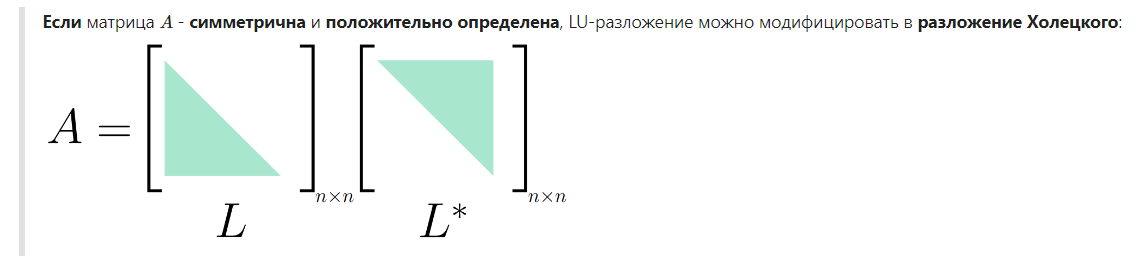



In [1]:
import numpy as np

def generate_correlated_samples(cov_matrix, num_samples=1):
    # Разложение Холецкого ковариационной матрицы
    try:
        L = np.linalg.cholesky(cov_matrix)
    except np.linalg.LinAlgError:
        raise ValueError("Ковариационная матрица не является положительно определенной.")

    # Генерация независимых стандартных нормальных случайных величин
    z = np.random.randn(cov_matrix.shape[0], num_samples)

    # Преобразование к случайным величинам с заданной ковариационной матрицей
    correlated_samples = np.dot(L, z)

    return correlated_samples

# Пример использования:
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]])
num_samples = 1000
samples = generate_correlated_samples(cov_matrix, num_samples)

# Сравненим производительности с библиотечной реализацией
import timeit

# Функция для генерации с использованием NumPy
def generate_correlated_samples_np(cov_matrix, num_samples=1):
    L = np.linalg.cholesky(cov_matrix)
    z = np.random.randn(cov_matrix.shape[0], num_samples)
    correlated_samples = np.dot(L, z)
    return correlated_samples

# Время выполнения пользовательской функции
user_time = timeit.timeit("generate_correlated_samples(cov_matrix, num_samples)", globals=globals(), number=1000)

# Время выполнения библиотечной функции
numpy_time = timeit.timeit("generate_correlated_samples_np(cov_matrix, num_samples)", globals=globals(), number=1000)

print("Время выполнения пользовательской функции:", user_time)
print("Время выполнения библиотечной функции:", numpy_time)


Время выполнения пользовательской функции: 0.043026700033806264
Время выполнения библиотечной функции: 0.04302470001857728


### 2. Обработка экспериментальных данных..

1. Обработайте какую-нибудь лабораторную работу (например, из курса общей физики или просто из папки на диске), требующую проведения прямой по экспериментально полученным точкам. Для решения задачи регрессии рекомендуется использовать библиотеку scikit-learn (sklearn) или scipy.

2. Создайте прямую с шумом и аналогично обработайте данные.

В обоих пунктах нужно построить график, на который будут нанесены точки и прямая среднеквадратической регрессии.

Данные можно сформировать следующим образом:

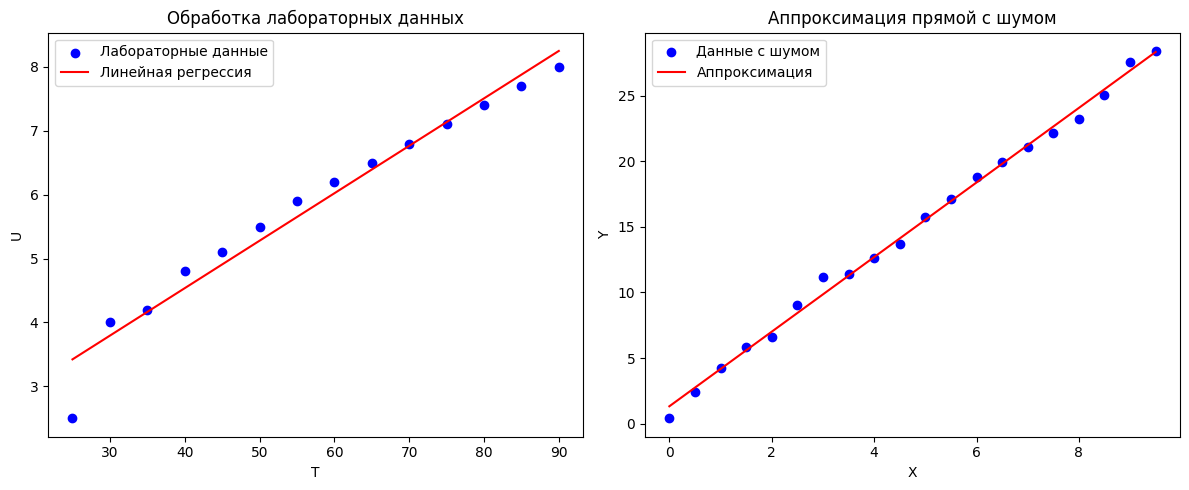

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

# Создание исходных лабораторных данных
data = pd.read_excel("C:/Users/rybal/Documents/Программирование/Вычматы/1 дз/data.xlsx")
T = data["T"][:-1]
U = data["U"][:-1]
I = data["I"][:-1]

# Создание прямой с шумом
true_w1 = 2.8
true_w0 = 1.5
xs = np.arange(0, 10, 0.5)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise

# Обработка лабораторных данных с использованием регрессии
reg = LinearRegression().fit(T.values.reshape(-1, 1), U)
predicted_U = reg.predict(T.values.reshape(-1, 1))

# Определение функции для аппроксимации данных прямой с шумом
def linear_function(x, a, b):
    return a * x + b

# Применение curve_fit для аппроксимации прямой с шумом
params, covariance = curve_fit(linear_function, xs, ys)
fit_ys = linear_function(xs, params[0], params[1])

# Построение графиков
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(T, U, label="Лабораторные данные", color='b')
plt.plot(T, predicted_U, color='r', label="Линейная регрессия")
plt.xlabel("T")
plt.ylabel("U")
plt.title("Обработка лабораторных данных")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(xs, ys, label="Данные с шумом", color='b')
plt.plot(xs, fit_ys, color='r', label="Аппроксимация")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Аппроксимация прямой с шумом")
plt.legend()

plt.tight_layout()
plt.show()


### 3. Правдоподобие для гауссовой вероятностной модели.

Пусть дана выборка точек на прямой $\left\{x_i\right\}$.

Максимизируйте правдоподобие (или его логарифм) в гауссовой вероятностной модели:
$$
\prod_i p\left(x_i\right) \rightarrow \max _{\mu, \sigma} \quad p(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} .
$$



## Функция правдоподобия

Функция правдоподобия в гауссовой вероятностной модели определяется следующим образом:

$$L(\mu, \sigma^2) = \prod_{i=1}^n \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$$

## Логарифм правдоподобия

Для удобства часто используется логарифм функции правдоподобия:

$$ \ln L(\mu, \sigma^2) = \sum_{i=1}^n (-\frac{1}{2} \ln(2\pi\sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} $$

## Условия максимизации

Для нахождения оптимальных значений $\mu$ и $\sigma$ максимизируем логарифм правдоподобия. Условия максимизации по $\mu$ и $\sigma$ следующие:

1. Для $\mu$:

$$ \frac{\partial \ln L}{\partial \mu} = \sum_{i=1}^n \frac{x_i - \mu}{\sigma^2} = 0 $$

2. Для $\sigma$:

$$ \frac{\partial \ln L}{\partial \sigma} = \sum_{i=1}^n (-\frac{1}{\sigma} + \frac{(x_i - \mu)^2}{\sigma^3} = 0 $$

Решение этих уравнений дает оптимальные значения параметров:

Для $\mu$:

$$ \mu = \frac{1}{n} \sum_{i=1}^n x_i $$

Для $\sigma$:

$$ \sigma = \sqrt{3}{\frac{1}{n}} \sum_{i=1}^n (x_i - \mu)^2 $$

Итак, оптимальные значения параметров:

$$ \mu = \frac{1}{n} \sum_{i=1}^n x_i $$

$\sigma = \sqrt{3}{\frac{1}{n}} \sum_{i=1}^n (x_i - \mu)^2$

Таким образом, решение уравнений дает оптимальные значения параметров $\mu$ и $\sigma$ для гауссовой вероятностной модели.


### 4. Гауссовы интегралы для МНК.  


На лекции обсуждался учет влияния систематической погрешности путем усреднения решения задачи МНК по гауссовому нормальному распределению для $y$-координат точек выборки: $\tilde{y}_i \sim \mathcal{N}\left(y_i, s^2\right)$, где погрешность по оси ординат считалась равной $s$. Обобщите этот вывод на случай, когда каждая точка имеет свою $y$-погрешность $s_i$. Для этого проведите усреднение по многомерному нормальному распределению для $\tilde{y}_i$ с произвольной симметричной матрицей ковариации $A^{-1}$ :
$$
\begin{array}{r}
\tilde{y} \sim \frac{1}{(2 \pi)^{N / 2} (\operatorname{det} (A))^{1/2} } \exp \left(-\frac{(\tilde{y}-y)^T A^{-1}(\tilde{y}-y)}{2}\right), \ \ \ \ (1) \\
\text { где } y=\left(\begin{array}{lll}
y_i & \ldots & y_N
\end{array}\right)^T, \text { a } \tilde{y}=\left(\begin{array}{lll}
\tilde{y}_i & \ldots & \tilde{y}_N
\end{array}\right)^T .
\end{array}
$$
1. Покажите, что распределение (1) правильно нормировано. Указание: Выполните замену координат $\tilde{y}-y=S z$, где матрица $S$ диагонализует $A$.
2. Вычислите неприводимые парные корреляторы $\left\langle\left\langle\tilde{w}_i \tilde{w}_j\right\rangle\right\rangle$, усредняя по распределению (1). Указание: Сделайте замену $\tilde{y}-y=Y$. Для вычисления гауссового интеграла с предэкспонентой вычислите интеграл $\int d^N Y \exp \left(-Y^T A^{-1} Y / 2+J^T Y\right)$ и выполните дифференцирование по параметрам $J_i$ (компоненты вектора $J$ ).


1. Покажем, что распределение (1) правильно нормировано:

   $$\int \frac{1}{(2 \pi)^{N/2} (\det(A))^{1/2}} \exp\left(-\frac{(\tilde{y} - y)^T A^{-1} (\tilde{y} - y)}{2}\right) d^N\tilde{y} = \frac{1}{(2 \pi)^{N/2} (\det(A))^{1/2}} \int \exp\left(-\frac{z^T z}{2}\right) d^N z \quad \text{(после замены }\tilde{y} - y = Sz\text{, где матрица }S\text{ диагонализует }A) = 1,$$

   где мы воспользовались тем, что интегралы по каждой из координат $z_i$ отдельно равны 1.

2. Вычислим неприводимые парные корреляторы $\left\langle\left\langle\tilde{w}_i \tilde{w}_j\right\rangle\right\rangle$:

   Для этого введем предэкспоненту и вычислим интеграл:

   $$
   \int \exp\left(-\frac{Y^T A^{-1} Y}{2} + J^T Y\right) d^N Y = \sqrt{\frac{(2\pi)^N}{\det(A)}} \exp\left(\frac{1/2}J^T A J\right).
   $$

   Теперь мы можем записать неприводимые парные корреляторы:

   $$
   \left\langle\left\langle\tilde{w}_i \tilde{w}_j\right\rangle\right\rangle = \frac{w_i w_j}{\det(A)} + s_i
   $$

### 5. Систематические погрешности в МНК.

Выполните в условиях предыдущей задачи.

1. Оцените систематические погрешности параметров модели $w_\alpha$, следуя вычислению, приведенному на лекции, и используя корреляторы, полученные в предыдущем пункте.
2. Запишите решение в частном случае диагональной матрицы $A=\operatorname{diag}\left(A_1, \ldots, A_N\right)$. Как следует выбирать величины $A_i$ для моделирования $y$-погрешности $i$-ой точки, равной $s_i$ ?

1. Для оценки систематических погрешностей параметров модели $w_\alpha$, мы можем использовать формулу

$\delta w_\alpha = -\sum_{i, j} \left\langle\left\langle \tilde{w}_i \frac{\partial \tilde{w}_i}{\partial w_\alpha} \right\rangle\right\rangle^{-1} \left\langle\left\langle \tilde{w}_j \right\rangle\right\rangle \left\langle\left\langle \tilde{w}_j \frac{\partial \tilde{w}_j}{\partial w_\alpha} \right\rangle\right\rangle,$

где $\frac{\partial \tilde{w}i}{\partial w\alpha}$ - производная $\tilde{w}i$ по параметру $w\alpha$, $\left\langle\left\langle \tilde{w}_i \right\rangle\right\rangle$ и $\left\langle\left\langle \tilde{w}_i \frac{\partial \tilde{w}i}{\partial w\alpha} \right\rangle\right\rangle$ - усреднения по распределению (1), а $\left\langle\left\langle \tilde{w}_j \right\rangle\right\rangle$ и $\left\langle\left\langle \tilde{w}_j \frac{\partial \tilde{w}j}{\partial w\alpha} \right\rangle\right\rangle$ - усреднения парных корреляторов из предыдущего пункта.

2. В частном случае диагональной матрицы $A=\operatorname{diag}\left(A_1, \ldots, A_N\right)$, формула упрощается до

$\delta w_\alpha = -\sum_{i, j} \frac{\left\langle \tilde{w}_i \tilde{w}_j \right\rangle}{\left\langle \tilde{w}_i \frac{\partial \tilde{w}_i}{\partial w_\alpha} \right\rangle} \left\langle \tilde{w}_j \frac{\partial \tilde{w}_j}{\partial w_\alpha} \right\rangle,$

где $\left\langle \tilde{w}_i \tilde{w}_j \right\rangle$ и $\left\langle \tilde{w}_j \frac{\partial \tilde{w}j}{\partial w\alpha} \right\rangle$ - парные корреляторы из предыдущего пункта.

Чтобы выбрать величины $A_i$ для моделирования $y$-погрешности $i$-ой точки, равной $s_i$, мы можем использовать следующее соотношение:
$A_i = \frac{1}{s_i^2}$,
где $s_i$ - погрешность для $i$-ой точки. Это означает, что дисперсия точки $\tilde{y}_i$ будет равна $s_i^2$.